Importing the required modules

In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
 

Reading the data into dataframe

In [4]:
df = pd.read_csv(r'D:\datascience\projects\Python-Projects\taxi_analysis\datasets\data_orders.csv')
df.head(5)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [26]:
uni_val = df['is_driver_assigned_key'].unique()
print(uni_val)

[1 0]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


Extraxt data where the ride has been cancelled after assigning the driver

In [29]:
grouped_after = df.groupby('is_driver_assigned_key')
cancelled_after_assigned = grouped_after.get_group(1)
Cancelled_after_assigned = grouped_after.get_group(1)['order_gk'].size
print(f'No. of rides cancelled after assigning the driver: {Cancelled_after_assigned}')

No. of rides cancelled after assigning the driver: 22512


Driver Assigned but client cancelled

In [22]:
client_group1 = cancelled_after_assigned.groupby(['order_status_key'])
driver_assign_client_cancelled = client_group1.get_group(4)
Driver_assign_client_cancelled = client_group1.get_group(4)['order_gk'].count()
print(f' No. of rides cancelled by the client after assigning the driver: {Driver_assign_client_cancelled}')

 No. of rides cancelled by the client after assigning the driver: 2811


Driver Assigned but system cancelled

In [23]:
system_group1 = cancelled_after_assigned.groupby(['order_status_key'])
driver_assign_system_cancelled = system_group1.get_group(9)
Driver_assign_system_cancelled = system_group1.get_group(9)['order_gk'].count()
print(f'No. of rides cancelled by the system after assigning the driver: {Driver_assign_system_cancelled}')

No. of rides cancelled by the system after assigning the driver: 3


Extraxt data where the ride has been cancelled before assigning the driver

In [24]:
grouped_before = df.groupby('is_driver_assigned_key')
cancelled_before_assigned = grouped_before.get_group(0)
Cancelled_before_assigned = grouped_before.get_group(0)['order_gk'].count()
print(f'No. of rides cancelled before drivers assignment: {Cancelled_before_assigned}')

No. of rides cancelled before drivers assignment: 7902


Driver not assigned but client cancelled

In [30]:
client_group2 = cancelled_before_assigned.groupby(['order_status_key'])
driver_notassign_client_cancelled = client_group2.get_group(4)
Driver_notassign_client_cancelled = client_group2.get_group(4)['order_gk'].count()
print(f'No. of  rides cancelled by client before driver is assigned: {Driver_notassign_client_cancelled}')

No. of  rides cancelled by client before driver is assigned: 4496


Driver not assigned but system cancelled

In [31]:
system_group2 = cancelled_before_assigned.groupby(['order_status_key'])
driver_notassign_system_cancelled = system_group2.get_group(9)
Driver_notassign_system_cancelled = driver_notassign_system_cancelled['order_gk'].count()
print(f'No. of rides cancelled by the system before driver assigned: {Driver_notassign_system_cancelled}')

No. of rides cancelled by the system before driver assigned: 3406


Bar Graph for Driver assigned VS Driver Not Assigned

In [37]:
categories = ['Cancelled before driver assigned', 'Cancelled after driver assigned']
Values = [Cancelled_before_assigned, Cancelled_after_assigned]
print(Values)

[7902, 22512]


<function matplotlib.pyplot.show(close=None, block=None)>

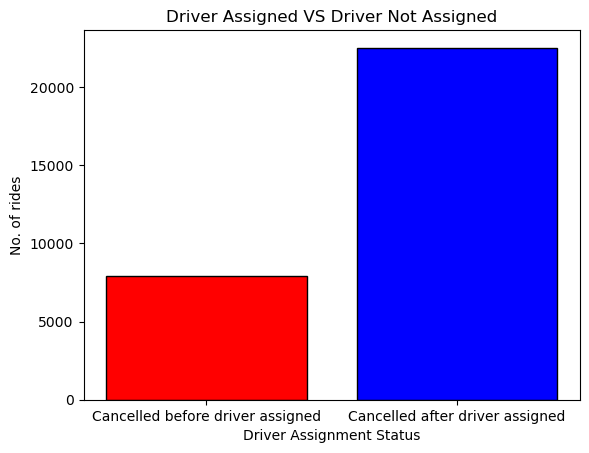

In [43]:
plt.bar(categories, Values, color = ('red', 'blue'), edgecolor = 'black')

plt.xlabel('Driver Assignment Status')
plt.ylabel('No. of rides')
plt.title('Driver Assigned VS Driver Not Assigned')
plt.show